11_bbs.jpg


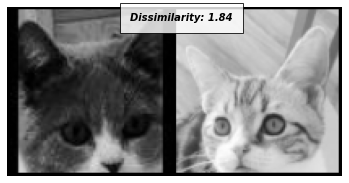

cat1.jpg


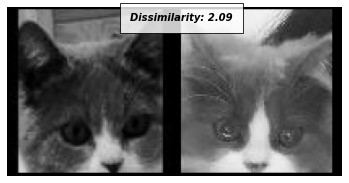

cat2.jpg


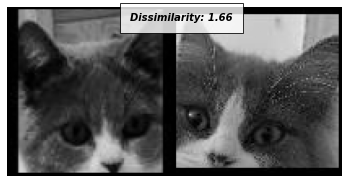

cat4.jpg


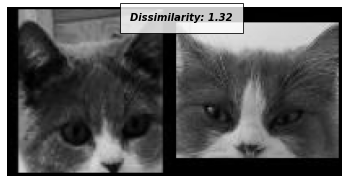

cat2 copy.jpg


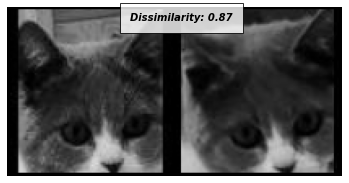

cat3.jpg


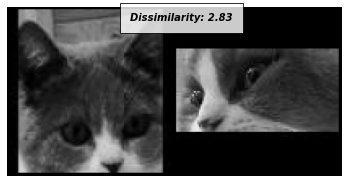

cat6.jpg


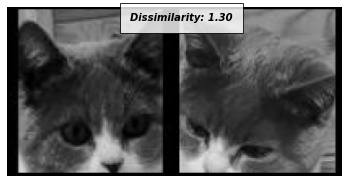

In [9]:


from config import Config
from contrastiveLoss import ContrastiveLoss
from siameset import SiameseNetwork
from SiameseNetworkDatasetWithSource import SiameseNetworkDatasetWithSource
from Util import *
import os

folder_dataset_test = dset.ImageFolder(root=Config.testing_dir+"/cat")
siamese_dataset = SiameseNetworkDatasetWithSource(
                                        imageFolderDataset=folder_dataset_test
                                        ,transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False
                                       ,sourceImgBase64="/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABQAFADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDgvhheQafBrFzcyLHEhgyx/wCB13q+IdL1r5LO4DSg58tgVbGDkjPXp2rxTRt7mWIMwRipZQeCRnH8zWq0ctpIk0bNG4+ZGU4I9/as6sOeLj3NacuVpno3iBf3NuwDMRJjCjJOQay44rg42Wc5P+0pH8zS2Ouf29pkYYL9rhkHmL03DkbsVqW8zRKEEY+gNeLOLpvlZ69OalG6KItL585t0XH9+Uf/AF6V7G7UZaWBQTjA3Mc/TitraSNwU/NgMtKbdpZeAcoc9Pas7yexXOjETTSxJlvJFHtFtH51K2mWiruSaaXnDfvBj9BUrteRXJT7LMEDDEu8c+uVPb3qnqOvWunWE0iHfMWIXjgt/XHH51oqNWTskTKtCKu2Z+t3mmaYqw20Cy3jDIMjFwg9SDwT7H1FcF4gubi6v45LmV5H8oAFznAyePpWmjPNM09y7SSOdxJ6k1ka0++8Q/8ATMfhya9ejSVNWPLr1XUd2Lo8hjuDhiqkruI9Oa7Voo/sPmTMBI+SkSrlgOOSOwrgbVtoc9uMn862bPXEtGysRcoOPmIyfcjt7d/zrZmSehOLm40bUku4Mo452uDyuehFekaZ4i0+9tVkdYCS20kqAQfT6/zxXj91dzX0rSysST7dK29EmW0gk38q653A8qRnB9+uKlwT3Q1NrY9gGppGMLtRFH3duOtZF54iIZwkuAAMEjgg1wEOoTApGJDIGBGW5Jz1FXLmZJIsF2WRcAuWyCcc/qafKlshcz7l+7vmlkAE5cuSWKvnArkNS1Jbm980RsqR/LGrjGB649f8atw3z2E+WjBIO9kPQn/9ePyqneRR3sgFuMlyTk8YJPf9P/1U7BcfbPkM0TqhYfMWIB/CsfUjm5HzbsLjOMZ5NPlt5rGdhMrZXvioLwhpEYAgFM8/U0A3oW9MthNZXsmDuQJjnjnPX8qqxxyAsNpBzhvauk8HITYas4L4QR5REyWyH49vwrKR5ULoUZA/TtxQShY2jgjwoD5PLHtSlpJTt3fKTnAo8on5dvSpUhbjaCCfamMsW4aNFY8H7q/SrBcgHrtHSoVYghXTnGAffIq1HGfLcHsMnjOMf/XxQBHNCkkBU8uwwp9O9UJLRrRjgttHDDpk8cf0rUAWRkKjJ28DHWoYA06gOxbaMBzk8+vP1P4k9qAM6W5E6COfc6g8BeBmqOqeX5luI+0Iz9dzVuXNiYpwXj4IyQBjI9hWX4ht4be7t1h+60AY/Xc1AmdR8MoI5/7UEiqyDySQwyD9+r/iOzTzWuW8sO5O0Ko6e3/1/wAKo/DORIYNZkkYKqiInP8AwOtXWdqW5kmkEjy/MowPl4zxycUgRya25GQBuY8sanlKWsWwlSxxwD+f9KmhsproBw/lIThW7k5xisO4RoGuopARcKSMsecdqLjLpulkdNvJRhnvkVs2MD301xDCqs7RnGRnpz+fH6Vx8bvB5Lqcy7unr7V7D4O8NyyXH24xhYJoPkYdsjrTA8/ctBIFMZzjjP6Vmtfiz2RJ1/vA9663xZpt3ptzckRkYGA+OBgcfzrg4oLm52CO0mkZehVSaBGlHqc8jtEY1YZzxkkfrWdrUvm3cZ6YjA/U1s6dZTWTNLcRgSt0Q84FZ3iXBv4TsCnyFzgYzywzQDOi+HiN9j1iYAlUMOcD18z/AAq7IJ7y+Bc7V6Y/z2rT+C1kL/T/ABNERni2I+v72p723mt9RJGZCpJYEY4+v0/KkwRkaifMJZSBgAKuOp6ZA9qy5oba8k23MJJ6eap2vWpNeCa7cTI65JYsrY5wen40kWnNO6+Su5Byx64/LrikMTR/DWk3HmeUtwZNuFeRhnt0wMCvZPCti+l6FBbzSbmwWGTn5ScgfkQK5fwv4XEUqXE6zNyMBlwB711niaXUI7RX0pInlj5MUh27x6A9j+dUCV2UfFWkW+qaVPABtkk+6cnG7tmuIfRp9L0ySMQFQjncyckAn1HbmqGn+LdY8Q61/Z/2f7MFOZjliyY4b0wc16ZcLDdWjRuSARxxnH60rjlFLY8XZTJLt6EnAPH+Ncx4nx/aMW37vkjB9fmbmvVLnw+WuioB2ZwSFC5/r+tef/EOzSx1y1hQgj7GpOBjne9Mm2h//9k=")
                                       

test_dataloader = DataLoader(siamese_dataset,num_workers=0,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)


PATH = "./net.pt"
net = SiameseNetwork()
net.load_state_dict(torch.load(PATH))



for i in range(0,siamese_dataset.__len__()):
    
    x0,x1,label2,filename = next(dataiter)
    print(os.path.basename(filename[0]))
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0),Variable(x1))
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))